**Import Tensorflow library**

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


**Import Other Libraries**

In [ ]:
import keras
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


**Dataset Path**

In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/kyomnom/Castor_Dataset'

**Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2) # set test split


**Test Data**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
IMG_SIZE = 299

In [ ]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        base_dir,
        # All images will be resized to 150x150
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        subset='training')

Found 61 images belonging to 8 classes.


**Validation Data**

In [ ]:
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=1,
        class_mode='categorical',
        subset='validation')

Found 12 images belonging to 8 classes.


**Model**

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax', name="preds"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



**Model Summary**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (1, 299, 299, 3)
labels batch shape: (1, 8)


**Model Compile**

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

**Model Training**

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
200/200 [==============================] - 44s 219ms/step - loss: 0.3571 - acc: 0.8794 - val_loss: 0.4522 - val_acc: 0.8750
Epoch 2/10
200/200 [==============================] - 11s 53ms/step - loss: 0.3344 - acc: 0.8831 - val_loss: 0.2441 - val_acc: 0.8750
Epoch 3/10
200/200 [==============================] - 10s 52ms/step - loss: 0.3158 - acc: 0.8844 - val_loss: 0.4074 - val_acc: 0.8694
Epoch 4/10
200/200 [==============================] - 11s 53ms/step - loss: 0.2977 - acc: 0.8869 - val_loss: 0.2407 - val_acc: 0.8569
Epoch 5/10
200/200 [==============================] - 11s 53ms/step - loss: 0.2839 - acc: 0.8900 - val_loss: 0.2146 - val_acc: 0.8919
Epoch 6/10
200/200 [==============================] - 10s 52ms/step - loss: 0.2778 - acc: 0.8881 - val_loss: 0.4773 - val_acc: 0.8869
Epoch 7/10
200/200 [==============================] - 10s 52ms/step - loss: 0.2560 - acc: 0.8988 - v

**Save Weights file**

In [ ]:
model.save('castor.h5')

**Ploting**

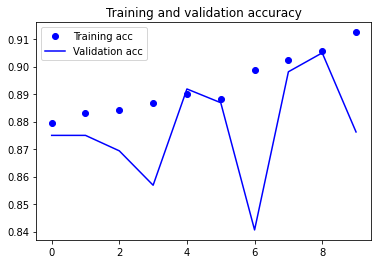

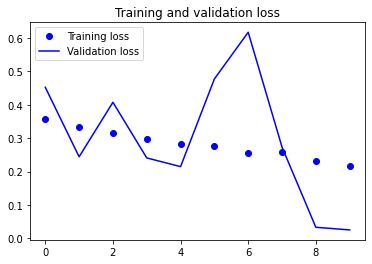

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Predict The Image**

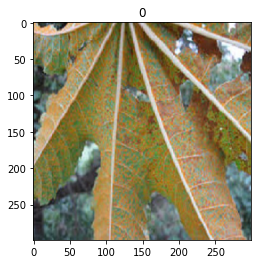

In [ ]:
from keras.preprocessing import image

IMG_SIZE = 299
loaded_model = keras.models.load_model('castor.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

image_path= base_dir+"/rust/rust_1.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(result[0])
plt.show()

**Predict Another Image**

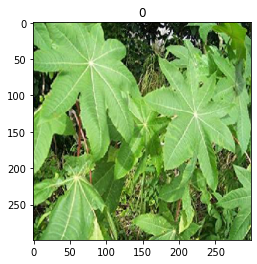

In [ ]:
image_path2 = base_dir+"/healthy/Healthy_1.jpeg"
img = image.load_img(image_path2, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(result[0])
plt.show()

# Inception V3

In [ ]:
from keras.applications import InceptionV3

InceptionV3_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
InceptionV3_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [ ]:
from keras import models
from keras import layers

InceptionV3_model = models.Sequential()
InceptionV3_model.add(InceptionV3_base)
InceptionV3_model.add(layers.Flatten())
InceptionV3_model.add(layers.Dense(1024, activation='relu'))
InceptionV3_model.add(layers.Dense(8, activation='softmax'))

In [ ]:
InceptionV3_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=['acc'])

In [ ]:
InceptionV3_history = InceptionV3_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Epoch 1/20
 - 22s - loss: 3.3450 - acc: 0.7825 - val_loss: 3.8343 - val_acc: 0.7725
Epoch 2/20
 - 10s - loss: 3.3450 - acc: 0.7825 - val_loss: 3.8343 - val_acc: 0.7675
Epoch 3/20
 - 10s - loss: 3.3065 - acc: 0.7850 - val_loss: 3.8343 - val_acc: 0.7725
Epoch 4/20
 - 10s - loss: 3.3450 - acc: 0.7825 - val_loss: 0.0000e+00 - val_acc: 0.7725
Epoch 5/20
 - 10s - loss: 3.3065 - acc: 0.7850 - val_loss: 3.8343 - val_acc: 0.7700
Epoch 6/20
 - 10s - loss: 3.4218 - acc: 0.7775 - val_loss: 3.8343 - val_acc: 0.7700
Epoch 7/20
 - 10s - loss: 3.3834 - acc: 0.7800 - val_loss: 3.8343 - val_acc: 0.7725
Epoch 8/20
 - 10s - loss: 3.2681 - acc: 0.7875 - val_loss: 0.0000e+00 - val_acc: 0.7700
Epoch 9/20
 - 10s - loss: 3.3065 - acc: 0.7850 - val_loss: 3.8343 - val_acc: 0.7700
Epoch 10/20
 - 10s - loss: 3.4218 - acc: 0.7775 - val_loss: 3.8343 - val_acc: 0.7725
Epoch 11/20
 - 10s - loss: 3.3065 - acc: 0.7850 - val_loss: 3.8343 - val_acc: 0.7700
Epoch 12/20
 - 10s - loss: 3.3065 - acc: 0.7850 - val_loss: 3.8343

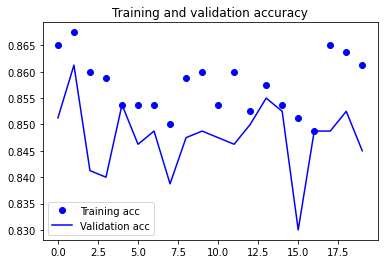

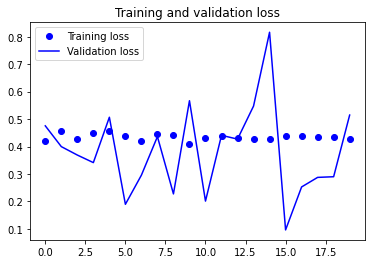

In [ ]:
import matplotlib.pyplot as plt

acc = InceptionV3_history.history['acc']
val_acc = InceptionV3_history.history['val_acc']
loss = InceptionV3_history.history['loss']
val_loss = InceptionV3_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

num_of_test_samples = 12
batch_size = 1
Y_pred = loaded_model.predict_generator(validation_generator, validation_generator.samples // validation_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(train_generator.class_indices.keys()) # Classes
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 0 0 0 1 0 1 0]
 [0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
Classification Report
                     precision    recall  f1-score   support

    Brown_leaf_spot       0.00      0.00      0.00         2
        Leaf_Blight       0.50      0.33      0.40         3
bacterial_leaf_spot       0.00      0.00      0.00         1
            healthy       0.00      0.00      0.00         1
     powdery_mildew       0.50      1.00      0.67         1
               rust       0.00      0.00      0.00         1
    seedling_blight       0.00      0.00      0.00         2
               wilt       0.00      0.00      0.00         1

           accuracy                           0.17        12
          macro avg       0.12      0.17      0.13        12
       weighted avg       0.17      0.17      0.16        12



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


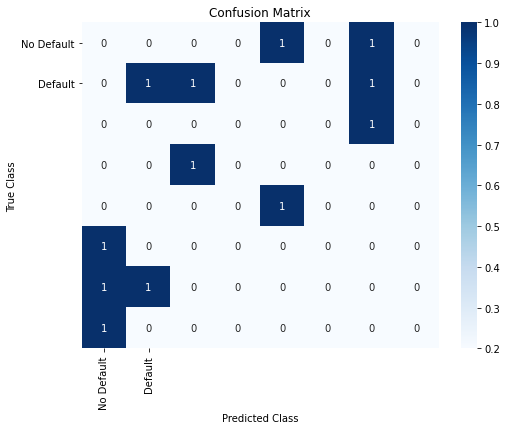

In [ ]:
import seaborn as sns

cm = confusion_matrix(validation_generator.classes, y_pred)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Saliency Map

**Install Module**

In [ ]:
!pip install git+https://github.com/raghakot/keras-vis.git --upgrade

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-j_kwcn0i
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-j_kwcn0i
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=f93dab36806617b2cecf8e5e92e3ea2fbc2bb0d93f4b946f3f3e84df4d0a9b20
  Stored in directory: /tmp/pip-ephem-wheel-cache-cvd1yzfj/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


**Call two images for visualization**

In [ ]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam
from vis.utils import utils

img1 = utils.load_img(base_dir+"/rust/rust_1.jpg", target_size=(IMG_SIZE, IMG_SIZE))
img2 = utils.load_img(base_dir+"/healthy/Healthy_1.jpeg" , target_size=(IMG_SIZE, IMG_SIZE))

**Time for saliency visualization.**

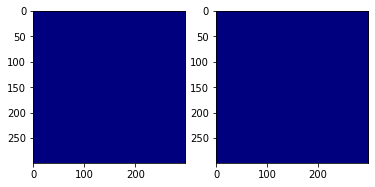

In [ ]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    
    grads = visualize_saliency(model, layer_idx, filter_indices=1, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

**Not that great. Very noisy. Lets try guided and rectified saliency. <br/>To use guided saliency, we need to set backprop_modifier='guided'. For rectified saliency or deconv saliency, use backprop_modifier='relu'.**

<Figure size 432x288 with 0 Axes>

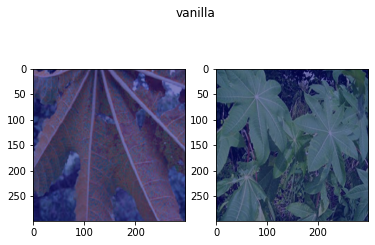

In [ ]:
penultimate_layer = utils.find_layer_idx(model, 'preds')

for modifier in [None]:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        
        grads = visualize_cam(model, layer_idx, filter_indices=1, 
                              seed_input=img, penultimate_layer_idx=1,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

<Figure size 432x288 with 0 Axes>

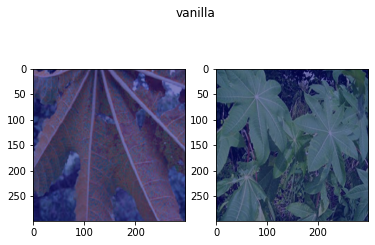

<Figure size 432x288 with 0 Axes>

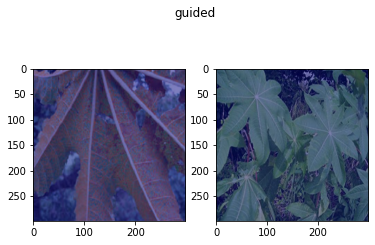

<Figure size 432x288 with 0 Axes>

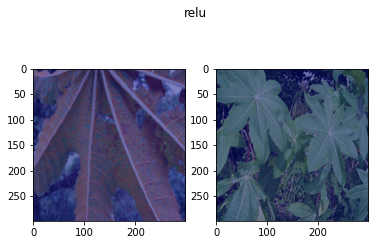

In [ ]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'preds')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        
        grads = visualize_cam(model, layer_idx, filter_indices=1, 
                              seed_input=img, penultimate_layer_idx=1,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))